In [33]:
# all inputs

In [2]:
import pandas as pd
import numpy as np

In [3]:
import scipy.stats as stats

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('titanic.csv',usecols=['age','fare','survived'])

df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.shape

(714, 3)

In [9]:
x = df[['age','fare']]
y = df['survived']


In [ ]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
# subplot and probplot

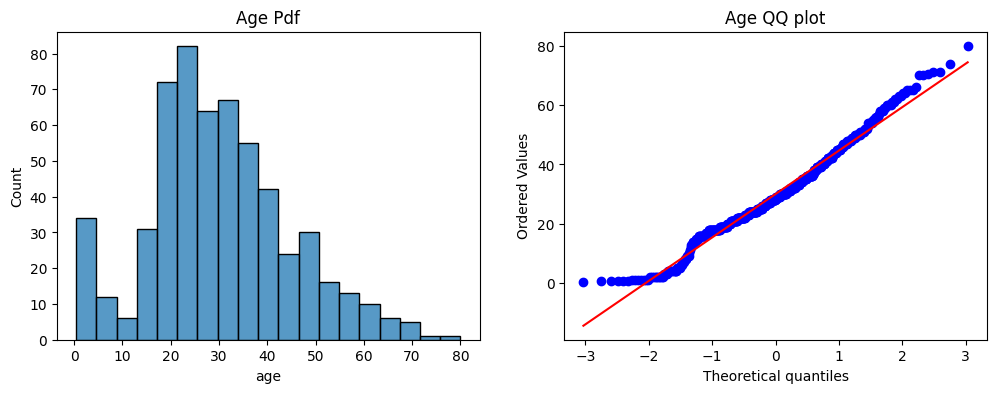

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(x_train['age'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(x_train['age'],dist='norm',plot=plt)
plt.title('Age QQ plot')


plt.show()

In [35]:
# subplot an dprobplot of fare 

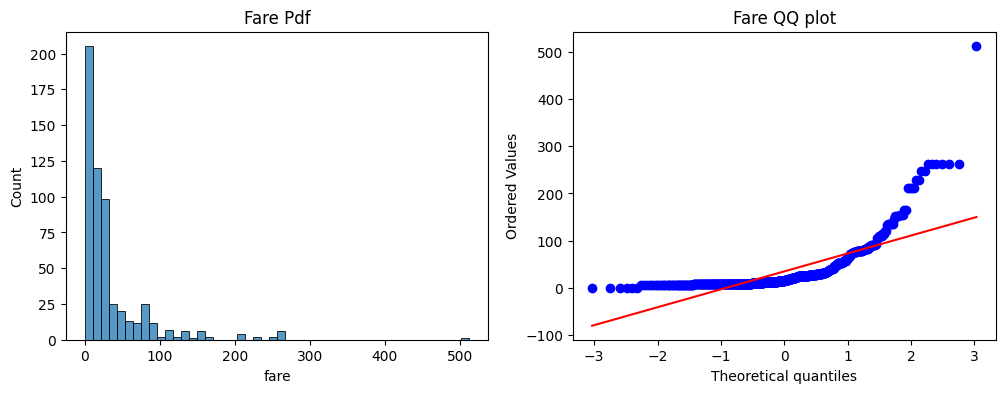

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(x_train['fare'])
plt.title('Fare Pdf')

plt.subplot(122)
stats.probplot(x_train['fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [36]:
# logistic regression

In [37]:
clf = LogisticRegression()
clf2 = LogisticRegression()

In [48]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [42]:
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6293706293706294
Accuracy DT 0.6293706293706294


In [43]:
# function transformer

In [52]:
trf = FunctionTransformer(np.log1p)

x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6153846153846154
Accuracy DT 0.6293706293706294


In [57]:
# this is works at age

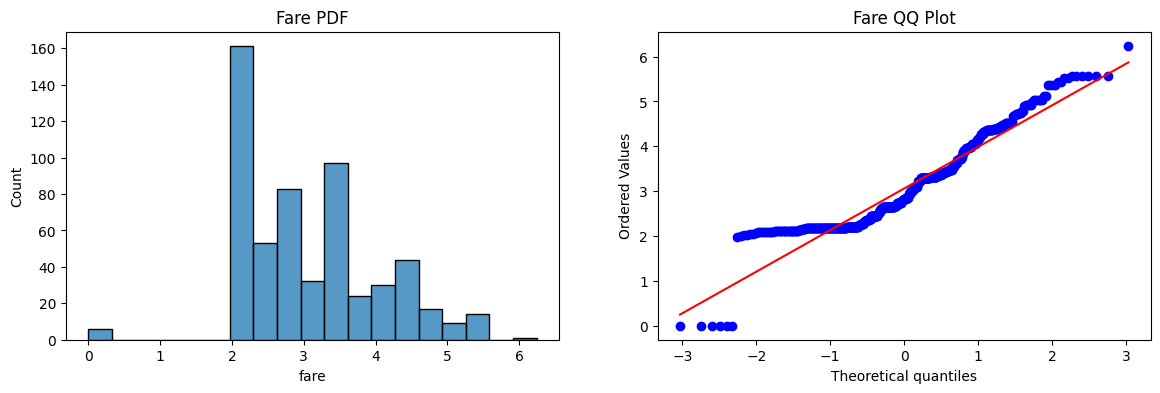

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train_transformed['fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train_transformed['fare'],dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [55]:
# this is not works at age 

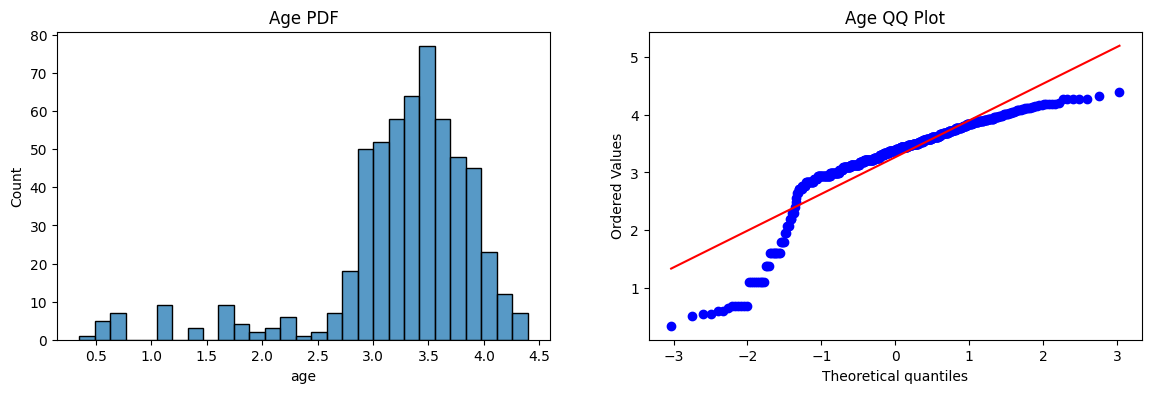

In [54]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train_transformed['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train_transformed['age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [60]:
trf = FunctionTransformer(np.sqrt)

x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6083916083916084
Accuracy DT 0.6503496503496503


In [61]:
trf = FunctionTransformer(np.square)

x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6433566433566433
Accuracy DT 0.6293706293706294


In [81]:
trf = FunctionTransformer(lambda x: 1/(x+0.001))

x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print('Accuracy DT',accuracy_score(y_test,y_pred1))

Accuracy LR 0.6013986013986014
Accuracy DT 0.6573426573426573
